# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [196]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [197]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [198]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [199]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [200]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [201]:
X = pima_df.drop("class", axis=1)
Y = pima_df["class"]

In [202]:
X['preg'] = X['preg'].replace(0,X['preg'].median())
X['plas'] = X['plas'].replace(0,X['plas'].median())
X['skin'] = X['skin'].replace(0,X['skin'].median())
X['test'] = X['test'].replace(0,X['test'].median())
X['mass'] = X['mass'].replace(0,X['mass'].median())

In [203]:
X.head(10)

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33
5,5,116,74,23,30.5,25.6,0.201,30
6,3,78,50,32,88.0,31.0,0.248,26
7,10,115,0,23,30.5,35.3,0.134,29
8,2,197,70,45,543.0,30.5,0.158,53
9,8,125,96,23,30.5,32.0,0.232,54


# Q5 Print the descriptive statistics of each & every column using describe() function

In [204]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

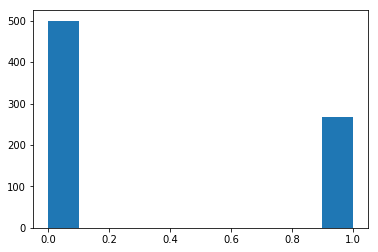

In [205]:
plt.hist(Y)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F2E6F60>,
      dtype=object)

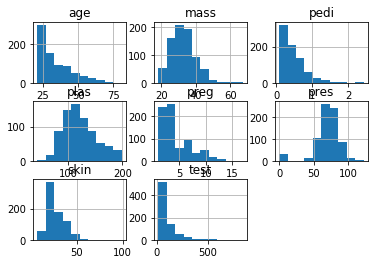

In [206]:
X.hist()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


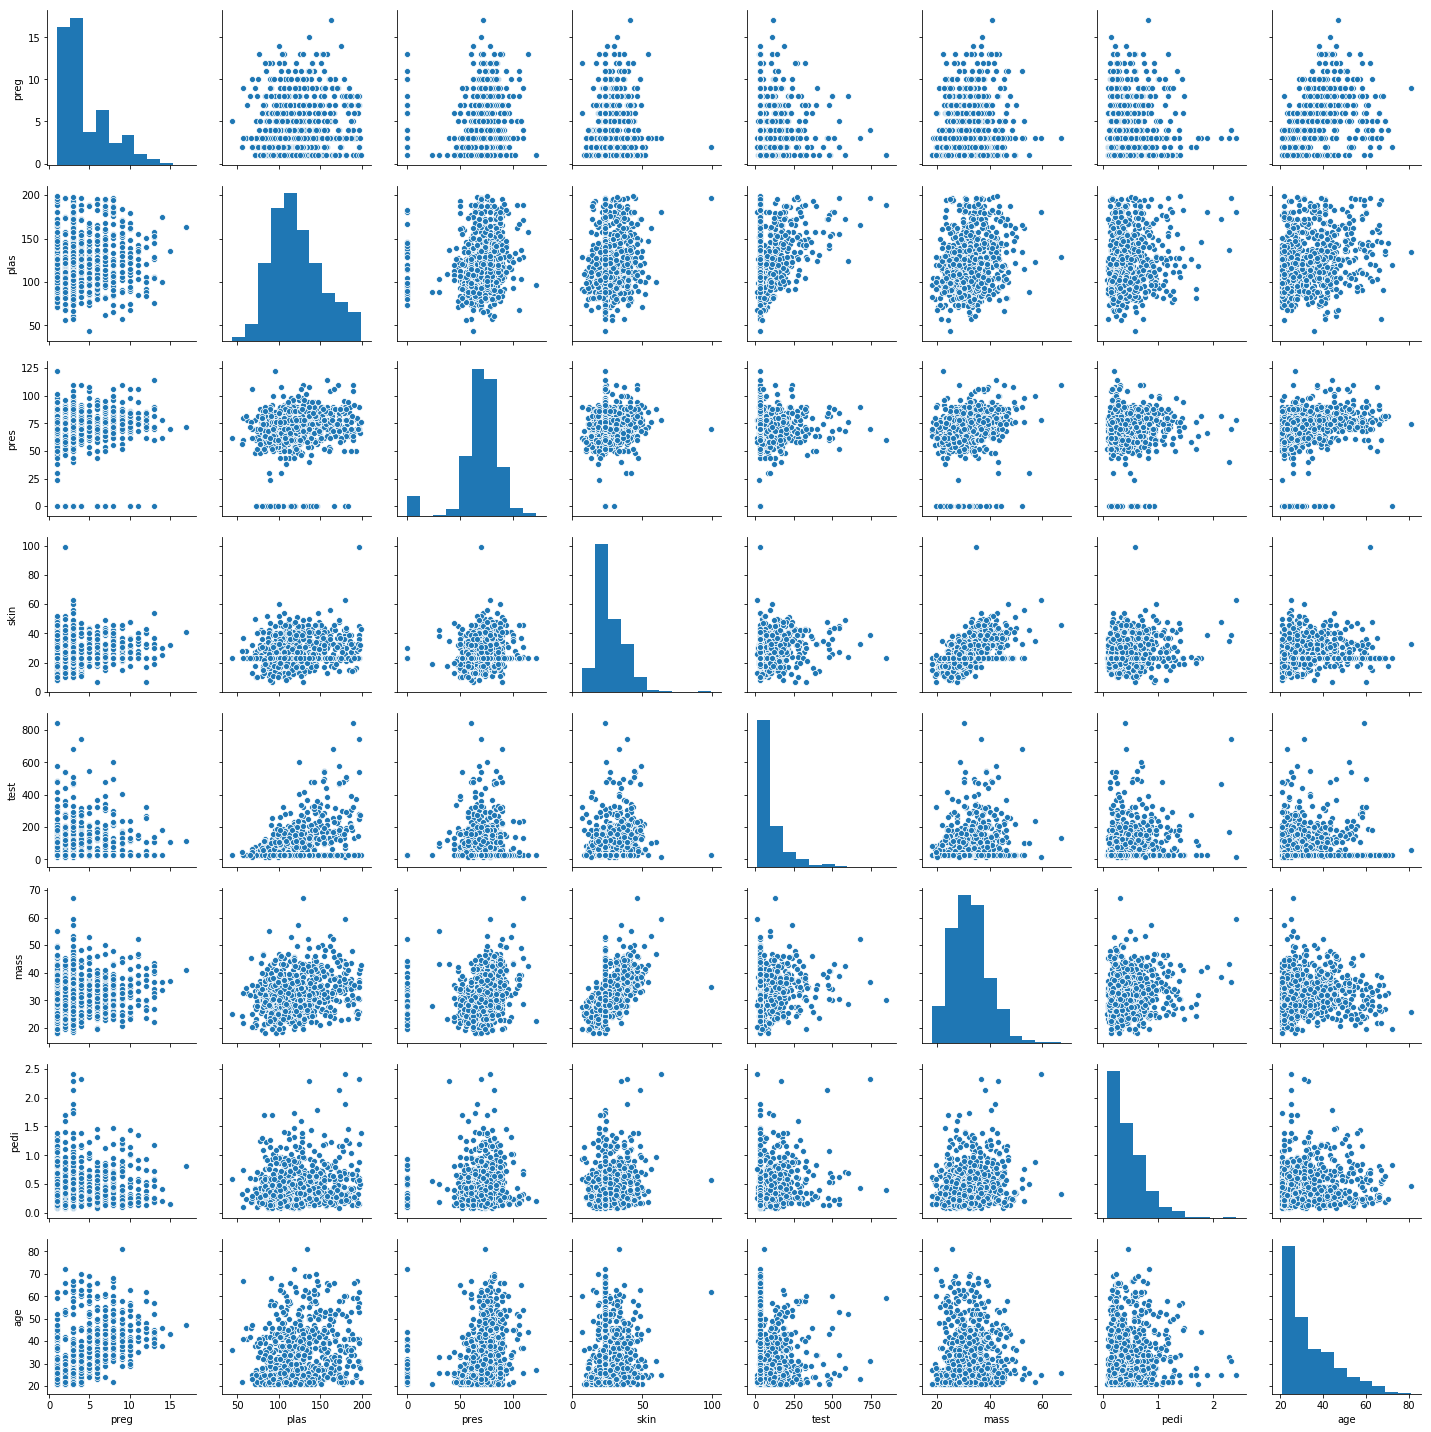

In [207]:
sns.pairplot(X)

Using the plot - infer the relationship between different variables

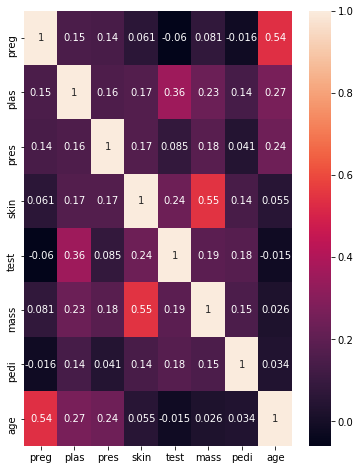

In [208]:
corr = X.corr()
plt.figure(figsize=(6, 8))
sns.heatmap(corr, annot=True)

In [209]:
# preg and age has high correlation
# skin and mass has high correlation

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [210]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

modelDefault = DecisionTreeClassifier(random_state=0)
modelDefault.fit(x_train,y_train)

parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy','gini']}  
GS=GridSearchCV(modelDefault,parameter,cv=3)                                          
GS.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [212]:
GS.best_params_ 

{'criterion': 'entropy', 'max_depth': 3}

In [213]:
modelDt=DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0)
modelDt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [214]:
y_pred=modelDt.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.7316017316017316

In [215]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[145,  12],
       [ 50,  24]], dtype=int64)

Print the feature importance of the decision model - Optional

In [216]:
# A decision tree is a support tool that uses a tree-like graph or model of decisions and their possible consequences. 
# It works for both categorical and continuous input and output variables.

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [217]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

parameter={'n_estimators': np.arange(1,10), 'max_depth':np.arange(1,10),'criterion' : ['entropy','gini']}  
GS=GridSearchCV(rf_model,parameter,cv=3)                                          
GS.fit(x_train,y_train)

D:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [218]:
gs_pred=GS.predict(x_test)
metrics.accuracy_score(y_test,gs_pred)
GS.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 7}

In [219]:
rf_model = RandomForestClassifier(n_estimators=7,max_depth=6,criterion='entropy',random_state=0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [220]:
y_pred=rf_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.7835497835497836

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [221]:
from sklearn.ensemble import AdaBoostClassifier

# n_estimators =  refer from rf_model
boost_rf=AdaBoostClassifier(base_estimator=rf_model,n_estimators=8,random_state=0)
boost_rf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=8, random_state=0)

In [222]:
y_pred = boost_rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7705627705627706

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [223]:
from sklearn.ensemble import BaggingClassifier

dtc = DecisionTreeClassifier()
bag_DT = BaggingClassifier(base_estimator=dtc, random_state=0)

parameter={'n_estimators': np.arange(1,10)}
bc_grid = GridSearchCV(estimator=bag_DT, param_grid=parameter, cv=3)
bc_grid.fit(x_train, y_train)
best_params = bc_grid.best_params_
best_params

{'n_estimators': 7}

In [224]:
# max_depth -- used above calculated max_depth value
finalDT = DecisionTreeClassifier(max_depth=3, random_state=0) 
bag_DT=BaggingClassifier(base_estimator=finalDT,n_estimators=7,random_state=0)
bag_DT.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=7, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [225]:
y_pred = bag_DT.predict(x_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)

parameter={'n_estimators': np.arange(1,10)}  
GS=GridSearchCV(gb_model,parameter,cv=3)                                          
GS.fit(x_train, y_train)
GS.best_params_

{'n_estimators': 7}

In [227]:
gb_model = GradientBoostingClassifier(n_estimators=7, random_state=0)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=7,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [228]:
y_pred = gb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [ ]:
# Random Forest has highest accuracy among other models